<a href="https://colab.research.google.com/github/r1marcus/Wallstreetbets-Analysis-Python/blob/main/WSB__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse WSB Notebook

Please read every comment to change it for your purpose

In [ ]:
!pip install praw


     |████████████████████████████████| 163kB 8.7MB/s 
     |████████████████████████████████| 204kB 25.3MB/s 


# Basic parameter

In [ ]:
#which post do you want to analyse?
url = "https://www.reddit.com/r/wallstreetbets/comments/lhumfo/what_are_your_moves_tomorrow_february_12_2021/"
#which reddit you want to analyse?
red="wallstreetbets"
#how many post you want to analyse?
post_number=500
#how many stocks you want to plot?
plot_number=6

In [ ]:
import praw
from collections import Counter
import re
from praw.models import MoreComments

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

As always, you need to begin by creating an instance of Reddit:

In [ ]:
reddit = praw.Reddit(
    client_id="clientid",
    client_secret="secret",
    password="yourpassword",
    user_agent="agent name",
    username="yourusername",
    check_for_async=False
)

In [ ]:
'''
subreddit = reddit.subreddit("wallstreetbets")
substring = "Daily"
a=0
for submission in subreddit.hot(limit=25):
    #print(submission.title)
    if substring in submission.title:
        print(submission.title)
        print (submission.id)
        id = submission.id

'''        

submission = reddit.submission(url=url)
#submission = reddit.submission(id=id)

comments=""



a=0   
submission.comments.replace_more(limit=1)
for top_level_comment in submission.comments:
    comments+= top_level_comment.body
    a=a+1
    
    
    
    
counts = Counter(comments)
print("you analysed"+str(a)+"comments")
comments = comments.lower()
comments = re.sub(r"[^a-zA-Z0-9]+", ' ', comments)

#filtert words:
swords=["re","ll","market","going","holding","day","back","weed","money","wsb","m","today","calls","puts","fuck","puts","like","bought","go","get","stock","stocks","shares","fucking","stock","buy","tomorrow","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
wordlist = [word for word in re.split("\W+",comments) if word.lower() not in swords]
wordlist = [item for item in wordlist if not item.isdigit()]
#replace slang
wordlist= [w.replace("mouse", "dis") for w in wordlist]

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

dictal={k:v for k,v in zip(wordlist, wordfreq)}
sort=sorted(dictal.items(), key=lambda item: item[1])
data=sort[::-1]
print(data)



you analysed521comments
[('gme', 38), ('sndl', 35), ('apha', 29), ('one', 28), ('next', 28), ('time', 24), ('getting', 23), ('new', 23), ('people', 21), ('ve', 20), ('feel', 19), ('see', 19), ('sell', 18), ('shit', 17), ('days', 17), ('know', 17), ('every', 17), ('automod', 17), ('make', 16), ('lose', 16), ('gonna', 16), ('right', 15), ('trade', 14), ('dump', 14), ('pump', 14), ('made', 14), ('week', 14), ('good', 14), ('even', 14), ('got', 14), ('lost', 14), ('buying', 13), ('think', 13), ('hold', 13), ('options', 13), ('pltr', 12), ('open', 12), ('meme', 12), ('never', 12), ('went', 12), ('yesterday', 12), ('joe', 11), ('months', 11), ('profit', 11), ('come', 11), ('short', 11), ('close', 11), ('moves', 11), ('start', 11), ('could', 11), ('losing', 10), ('hyln', 10), ('guys', 10), ('really', 10), ('anyone', 10), ('spy', 10), ('account', 10), ('everything', 10), ('put', 10), ('gains', 10), ('year', 10), ('retard', 10), ('since', 10), ('sold', 10), ('cnbc', 10), ('news', 9), ('run', 9)

# plot a barchart

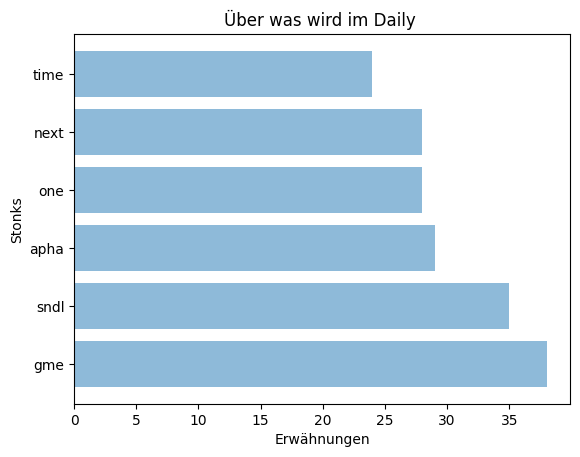

In [ ]:
objects = []
performance = []


for x in range(plot_number):
    objects.append(data[x][0])
    performance.append(data[x][1])

y_pos = np.arange(len(objects))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('Stonks')
plt.xlabel('Erwähnungen')
plt.title('Über was wird im Daily ')

plt.show()

# If you want analyse the whole reddit:



[('stock', 18), ('weed', 16), ('dd', 15), ('gme', 15), ('stocks', 14), ('tlry', 10), ('sndl', 9), ('one', 9), ('2', 9), ('re', 9), ('yolo', 9), ('money', 8), ('apha', 8), ('short', 7), ('post', 7), ('day', 7), ('future', 7), ('long', 7), ('term', 6), ('earnings', 6), ('moon', 6), ('go', 6), ('market', 6), ('update', 5), ('undervalued', 5), ('case', 5), ('play', 5), ('good', 5), ('volume', 5), ('think', 5), ('gang', 5), ('holding', 4), ('calls', 4), ('going', 4), ('value', 4), ('gains', 4), ('worth', 4), ('vs', 4), ('run', 4), ('11', 4), ('spce', 4), ('apes', 4), ('massive', 4), ('cannabis', 4), ('much', 4), ('time', 4), ('discussion', 4), ('crsr', 4), ('shares', 4), ('still', 4), ('got', 4), ('yesterday', 4), ('gonna', 3), ('bull', 3), ('analysis', 3), ('retards', 3), ('robinhood', 3), ('making', 3), ('game', 3), ('rkt', 3), ('retarded', 3), ('fund', 3), ('ready', 3), ('gain', 3), ('trying', 3), ('ubs', 3), ('wsb', 3), ('strong', 3), ('ape', 3), ('investors', 3), ('amd', 3), ('let', 3)

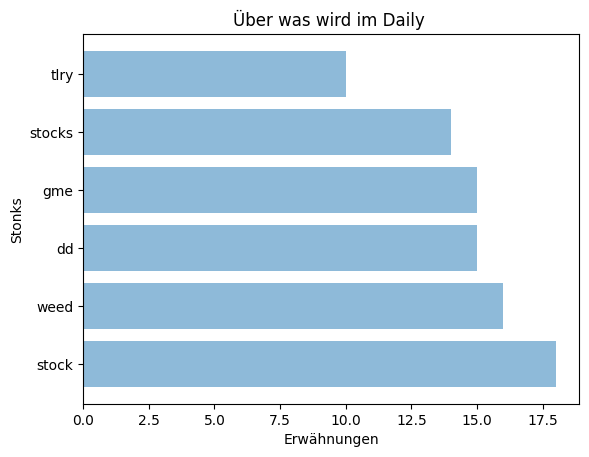

In [ ]:
subreddit = reddit.subreddit(red)
dict =        { "title":[],
                "subreddit":[],
                "score":[], 
                "id":[], 
                "url":[], 
                "comms_num": [], 
                "created": [], 
                "body":[]}
#how many post do you want to scan
test=subreddit.hot(limit=post_number)

for submission in test:
    dict["title"].append(submission.title)
    dict['subreddit'].append(submission.subreddit)
    dict["score"].append(submission.score)
    dict["id"].append(submission.id)
    dict["url"].append(submission.url)
    dict["comms_num"].append(submission.num_comments)
    dict["created"].append(submission.created)
    dict["body"].append(submission.selftext)
    
all = ""
for sentence in dict["title"]:
    all += sentence

counts = Counter(all)
all = all.lower()
all = re.sub(r"[^a-zA-Z0-9]+", ' ', all)

swords=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
wordlist = [word for word in re.split("\W+",all) if word.lower() not in swords]


wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

dictal={k:v for k,v in zip(wordlist, wordfreq)}
sort=sorted(dictal.items(), key=lambda item: item[1])
print(sort[::-1])
data=sort[::-1]


objects = []
performance = []


for x in range(plot_number):
    objects.append(data[x][0])
    performance.append(data[x][1])

y_pos = np.arange(len(objects))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('Stonks')
plt.xlabel('Erwähnungen')
plt.title('Über was wird im Daily ')

plt.show()